ARIMA model - In this code is using ARIMA model on Car Sales input data. Before getting into ARIMA model, two factors that 
decide upon which ARIMA model to choose will be discussed in detail.  ACF and PACF are the two factors which will help us decide ARIMA model. 

What is ARIMA?  

Lets split like this:  

AR - Auto Regressive
I - Differencing
MA - Moving Average

AR - This is something simiar to Linear Regression where in Linear Regression we will have regression between Dependent and Independent variables.  Here to understand the timeseries, variable will be correlated with the self previous time. That's why
this is called Auto Regression. 

MA - Moving Average tells moving average of the data for the given window width. 

Most of the data will either using AR or MA and sometimes both the models will be used for forecasting.  How do you define the model? Here comes ACF which is called Auto Correlation and PACF which is partial auto correlation. 

Auto correlation is how an observation at time t is correlated with time t-1 and so on. We call this as lag which is nothing but correlation between two consecutive time.  If the correlation is between t and t-1, then we call it as lag 1.  t and t-2 we call it as lag 2 and so on. 

Partial correlation is basically a auto regression of given time period. What is the direct effect of observation at time t-n on t without worrying about the other observation.  This is to find which lag will have better predictor for time t.  This can be calculated using regression formula except that we will use the same observation for both Independent and Dependent variables. 

Obs(t) = (Constant) Obs(t-1) + (Constant) Obs(t-2) + ... (Constant) Obs(t-n) + error_term

Lets not get deep into the writeup instead we will start putting the pieces into the code to understand the concept
practically using our Car Sales input data. 

           Month  Sales
Month                  
1960-01  1960-01   6550
1960-02  1960-02   8728
1960-03  1960-03  12026
1960-04  1960-04  14395
1960-05  1960-05  14587
...          ...    ...
1968-08  1968-08  16722
1968-09  1968-09  14385
1968-10  1968-10  21342
1968-11  1968-11  17180
1968-12  1968-12  14577

[108 rows x 2 columns]


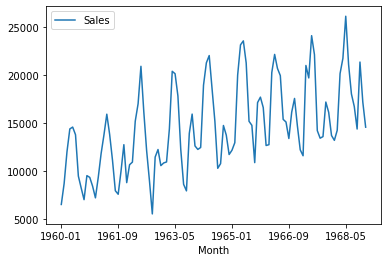

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import pacf
from matplotlib import pyplot as plt
from sklearn import model_selection as skl
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

path = 'monthly-car-sales.csv'
df = pd.read_csv(path, header=0)


df.index = df['Month']
df.drop('Unnamed: 0',axis =1 , inplace=True)


print(df)


df.plot()
plt.show()

In [3]:
df_new = df.copy()

df_new['Month'] = pd.to_datetime(df_new['Month'])
    
df_new.reset_index(drop=True, inplace=True)
    
df_new = df_new.set_index('Month')

I am trying to find how the pacf varies with the size of the data and the lags. Below I tried various lags with full data and
train and test split data.  This part of the code doesn't contribute to the ARIMA model decision but for understanding to see what the pacf at different lags and data. 

In [4]:
x = pacf(df_new['Sales'], nlags=20)
print(x)

[ 1.          0.72383481 -0.33358648 -0.08601433  0.27086804  0.21521762
 -0.2468014  -0.05192987  0.01127701  0.37858294  0.43348101  0.48965689
  0.27938183 -0.4984972  -0.3591058  -0.12577467 -0.07837002  0.431973
 -0.20929353  0.00445164 -0.29318026]


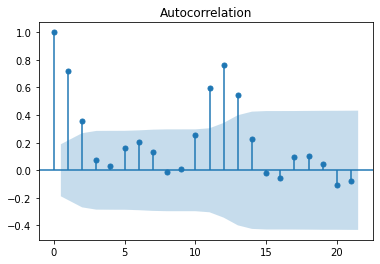

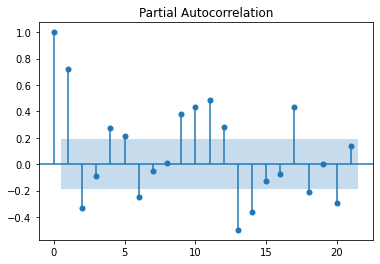

In [5]:
plot_acf(df_new['Sales'])
plt.show()

plot_pacf(df_new['Sales'])
plt.show()

In [36]:
train_data_size = round(len(df_new['Sales'])*.665)
train_data = df_new.iloc[:train_data_size]
test_data = df_new.iloc[train_data_size:]
print((train_data))
print((test_data))

            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587
...           ...
1965-08-01  14767
1965-09-01  10895
1965-10-01  17130
1965-11-01  17697
1965-12-01  16611

[72 rows x 1 columns]
            Sales
Month            
1966-01-01  12674
1966-02-01  12760
1966-03-01  20249
1966-04-01  22135
1966-05-01  20677
1966-06-01  19933
1966-07-01  15388
1966-08-01  15113
1966-09-01  13401
1966-10-01  16135
1966-11-01  17562
1966-12-01  14720
1967-01-01  12225
1967-02-01  11608
1967-03-01  20985
1967-04-01  19692
1967-05-01  24081
1967-06-01  22114
1967-07-01  14220
1967-08-01  13434
1967-09-01  13598
1967-10-01  17187
1967-11-01  16119
1967-12-01  13713
1968-01-01  13210
1968-02-01  14251
1968-03-01  20139
1968-04-01  21725
1968-05-01  26099
1968-06-01  21084
1968-07-01  18024
1968-08-01  16722
1968-09-01  14385
1968-10-01  21342
1968-11-01  17180
1968-12-01  14577


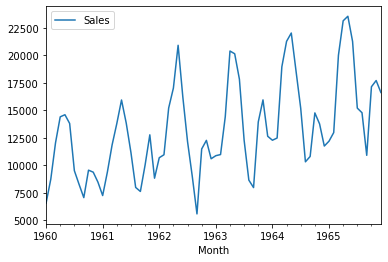

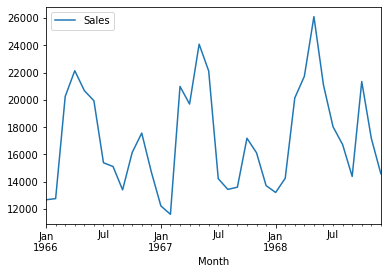

In [37]:
train_data.plot()
plt.show()

test_data.plot()
plt.show()

The following table summarizes how we use the sample autocorrelation function for model identification.

    SHAPE                            INDICATED MODEL
    
Exponential, 
decaying to zero                     Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model.

Alternating positive and 
negative, decaying to zero           Autoregressive model. Use the partial autocorrelation plot to help identify the order.

One or more spikes, 
rest are essentially zero            Moving average model, order identified by where plot becomes zero.

Decay, starting after a few lags     Mixed autoregressive and moving average model.

All zero or close to zero            Data is essentially random.

High values at fixed intervals       Include seasonal autoregressive term.

No decay to zero                     Series is not stationary.


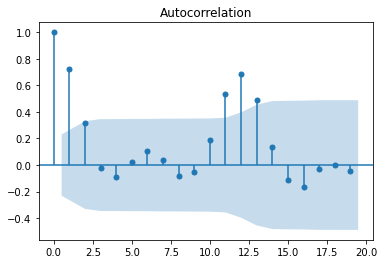

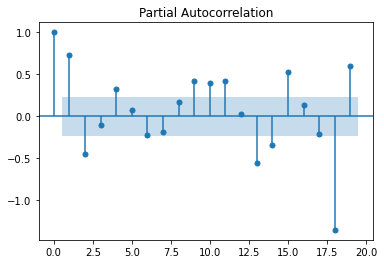

In [38]:
plot_acf(train_data['Sales'])
plt.show()

plot_pacf(train_data['Sales'])
plt.show()

ARIMA model assumes the data to be stationary.  As our input data is not stationary, it has to be made stationary first. When I tried to do differencing with time period as 12, the plot looks kind of stationary. 

Month
1960-01-01       NaN
1960-02-01       NaN
1960-03-01       NaN
1960-04-01       NaN
1960-05-01       NaN
               ...  
1965-08-01    4461.0
1965-09-01     103.0
1965-10-01    2378.0
1965-11-01    3943.0
1965-12-01    4873.0
Name: Sales, Length: 72, dtype: float64


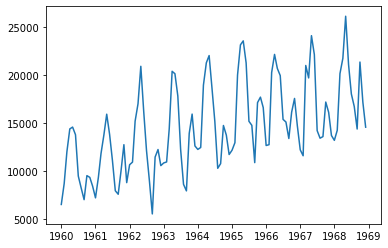

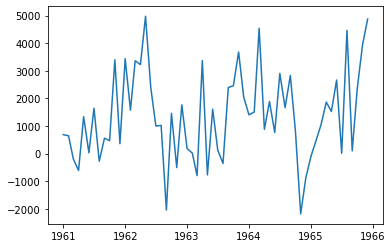

Month
1961-01-01     687.0
1961-02-01     646.0
1961-03-01    -189.0
1961-04-01    -611.0
1961-05-01    1339.0
1961-06-01      30.0
1961-07-01    1645.0
1961-08-01    -276.0
1961-09-01     561.0
1961-10-01     470.0
1961-11-01    3395.0
1961-12-01     360.0
1962-01-01    3440.0
1962-02-01    1573.0
1962-03-01    3363.0
1962-04-01    3226.0
1962-05-01    4974.0
1962-06-01    2384.0
1962-07-01    1000.0
1962-08-01    1022.0
1962-09-01   -2042.0
1962-10-01    1459.0
1962-11-01    -503.0
1962-12-01    1767.0
1963-01-01     185.0
1963-02-01      18.0
1963-03-01    -795.0
1963-04-01    3369.0
1963-05-01    -772.0
1963-06-01    1611.0
1963-07-01     125.0
1963-08-01    -355.0
1963-09-01    2394.0
1963-10-01    2458.0
1963-11-01    3680.0
1963-12-01    2045.0
1964-01-01    1405.0
1964-02-01    1505.0
1964-03-01    4539.0
1964-04-01     880.0
1964-05-01    1887.0
1964-06-01     765.0
1964-07-01    2907.0
1964-08-01    1664.0
1964-09-01    2830.0
1964-10-01     820.0
1964-11-01   -2182.0
1964-12

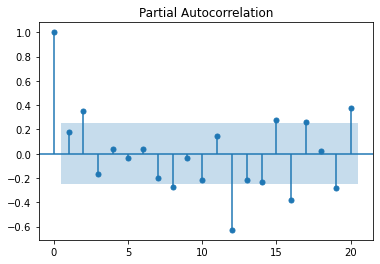

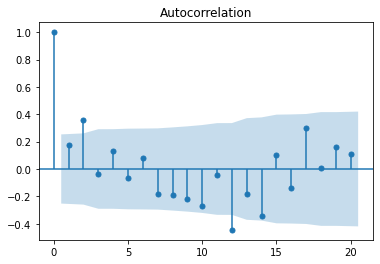

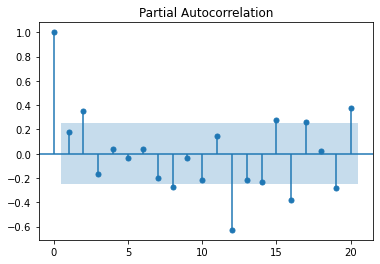

In [39]:
diff = train_data['Sales'].diff(12)

print(diff)

plt.plot(df_new['Sales'])
plt.show()


plt.plot(diff)
plt.show()


diff_1 = diff.dropna()

print(diff_1)

plot_acf(diff_1,lags=20)
plot_pacf(diff_1,lags=20)

In [83]:
model = ARIMA(train_data['Sales'],order=(12,1,0))
model_fit = model.fit()
predict = model_fit.forecast(len(test_data))
print(predict)
print(test_data)
print(np.sqrt(mean_squared_error(test_data,predict)))

1966-01-01    15059.399178
1966-02-01    15154.555041
1966-03-01    20295.258630
1966-04-01    22599.989965
1966-05-01    23986.088425
1966-06-01    20111.211721
1966-07-01    16465.495001
1966-08-01    13726.959581
1966-09-01    12833.174783
1966-10-01    17053.457726
1966-11-01    17227.357315
1966-12-01    17252.331153
1967-01-01    15154.524619
1967-02-01    16004.339459
1967-03-01    19527.591656
1967-04-01    22223.324163
1967-05-01    23171.979508
1967-06-01    19780.889058
1967-07-01    16665.449592
1967-08-01    13530.366370
1967-09-01    14116.278150
1967-10-01    16665.449170
1967-11-01    17430.065057
1967-12-01    17327.819005
1968-01-01    15475.725891
1968-02-01    16492.902111
1968-03-01    19047.069785
1968-04-01    21875.262878
1968-05-01    22314.728695
1968-06-01    19692.977269
1968-07-01    16519.210186
1968-08-01    13887.737146
1968-09-01    14766.937273
1968-10-01    16513.361906
1968-11-01    17686.196834
1968-12-01    17234.670656
Freq: MS, Name: predicted_me

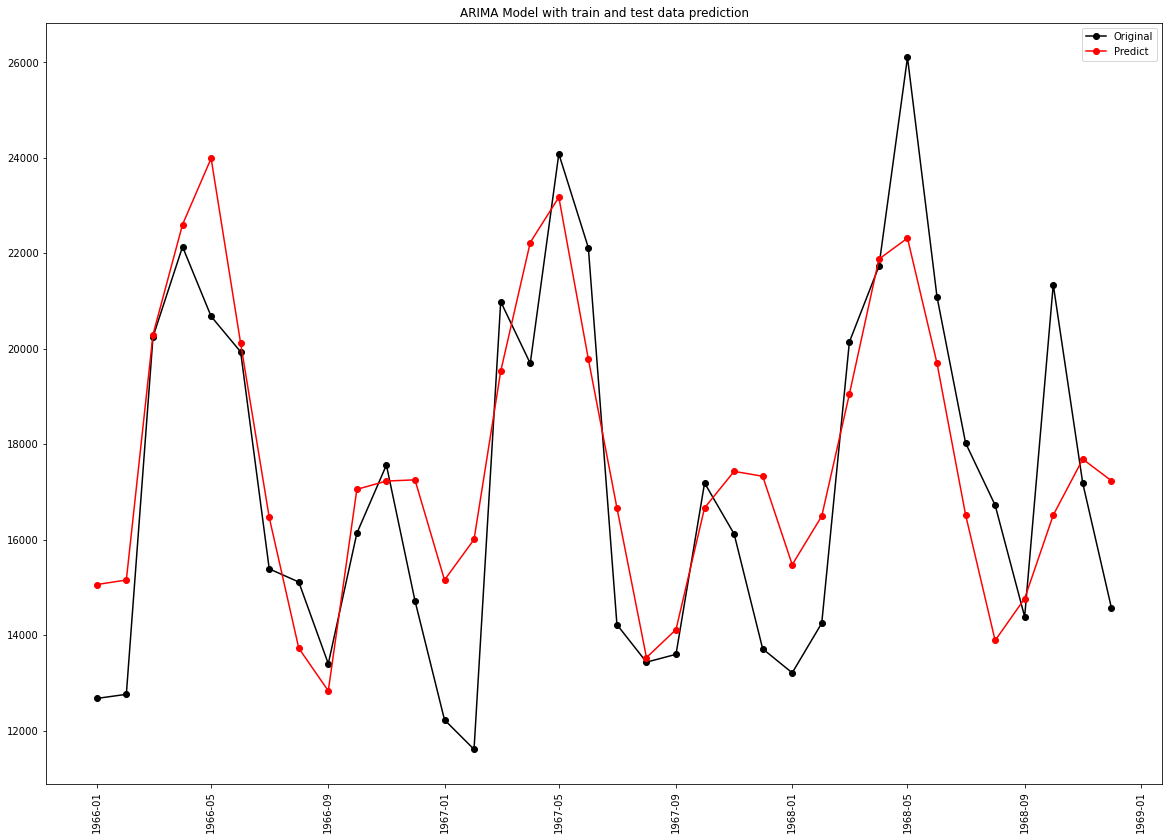

In [93]:
    
plt.figure(figsize=(20, 14))

x, = plt.plot(test_data, marker='o', color='black')

#y, = plt.plot(df_new['predict'], marker='o', color='blue')

z, = plt.plot(predict,marker='o',color='red')

plt.xticks(rotation = 'vertical')

plt.legend([x,z],['Original','Predict'])

plt.title("ARIMA Model with train and test data prediction")

plt.show()

Applying Grid SearchCV to get the optimized hyper parameters of p,d,q.  p will range 0 to 12, d ranges 0 to 3, q ranges 0 to 4

In [85]:
def gridsearch_arima(train_data,test_data):
    
    rmse = {}
    
    for p in range(0,13):
        for d in range(0,3):
            for q in range(0,5):
                order = (p,d,q)
                try:
                    model       = ARIMA(train_data['Sales'],order=(order))
                    model_fit   = model.fit()
                    predict     = model_fit.forecast(len(test_data))
                    rmse[order] = np.sqrt(mean_squared_error(test_data,predict))
                    
                except:
                    continue
    
    return rmse

rmse = gridsearch_arima(train_data,test_data)

final_rmse = min(rmse.items(),key=lambda x: x[1])

print(final_rmse)

((12, 0, 1), 1981.1143224739506)


Lets use the final_rmse for forecasting the orignal sales data. 

In [86]:
model = ARIMA(df['Sales'],order=(final_rmse[0]))
model_fit = model.fit()
forecast = model_fit.forecast(24)
print(forecast)

1969-01-01    12837.600835
1969-02-01    13744.705902
1969-03-01    19255.098118
1969-04-01    21959.153351
1969-05-01    24812.055256
1969-06-01    20784.826231
1969-07-01    18331.200009
1969-08-01    16108.220950
1969-09-01    16674.196827
1969-10-01    20241.849446
1969-11-01    17068.812745
1969-12-01    15365.299120
1970-01-01    12552.227134
1970-02-01    13966.399918
1970-03-01    18515.075983
1970-04-01    21749.703937
1970-05-01    23799.837910
1970-06-01    20541.743685
1970-07-01    18220.155711
1970-08-01    16328.221041
1970-09-01    17764.267274
1970-10-01    19553.065522
1970-11-01    17474.063124
1970-12-01    15469.071745
Freq: MS, Name: predicted_mean, dtype: float64


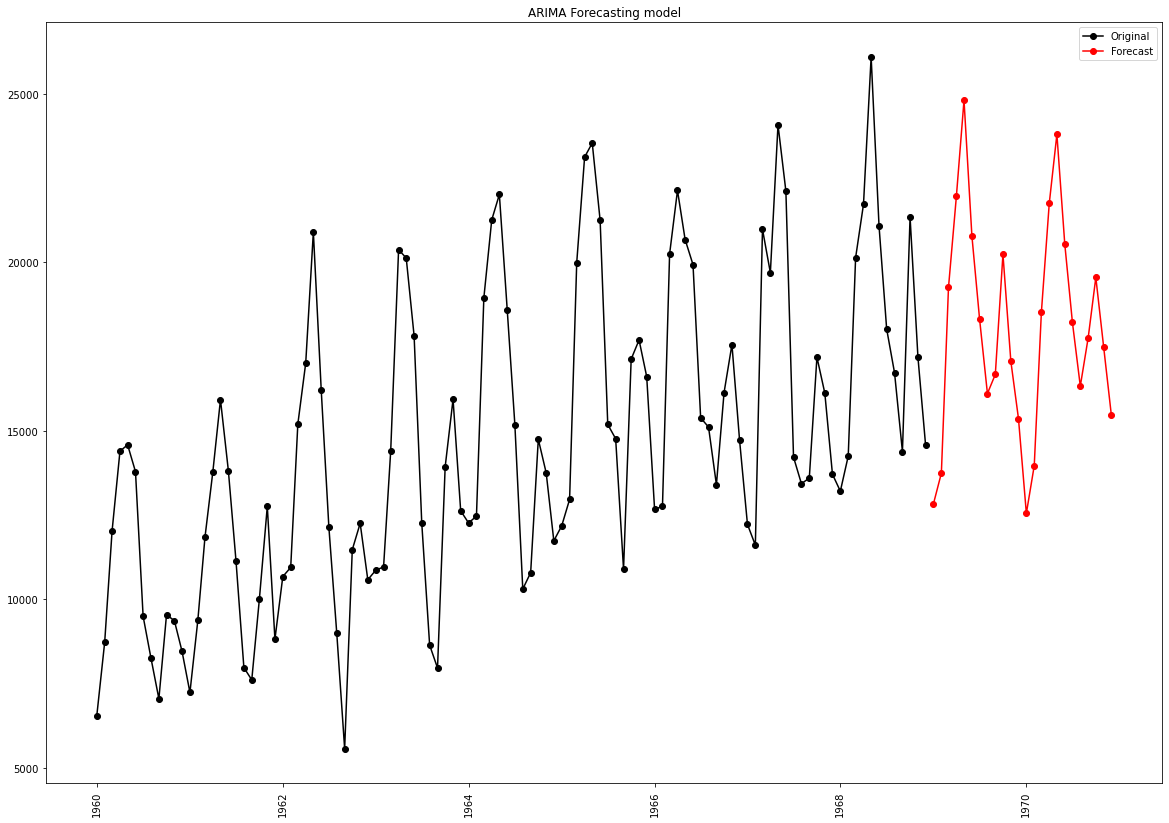

In [94]:
    
plt.figure(figsize=(20, 14))

x, = plt.plot(df_new['Sales'], marker='o', color='black')

#y, = plt.plot(df_new['predict'], marker='o', color='blue')

z, = plt.plot(forecast,marker='o',color='red')

plt.xticks(rotation = 'vertical')

plt.legend([x,z],['Original','Forecast'])

plt.title("ARIMA Forecasting model")

plt.show()

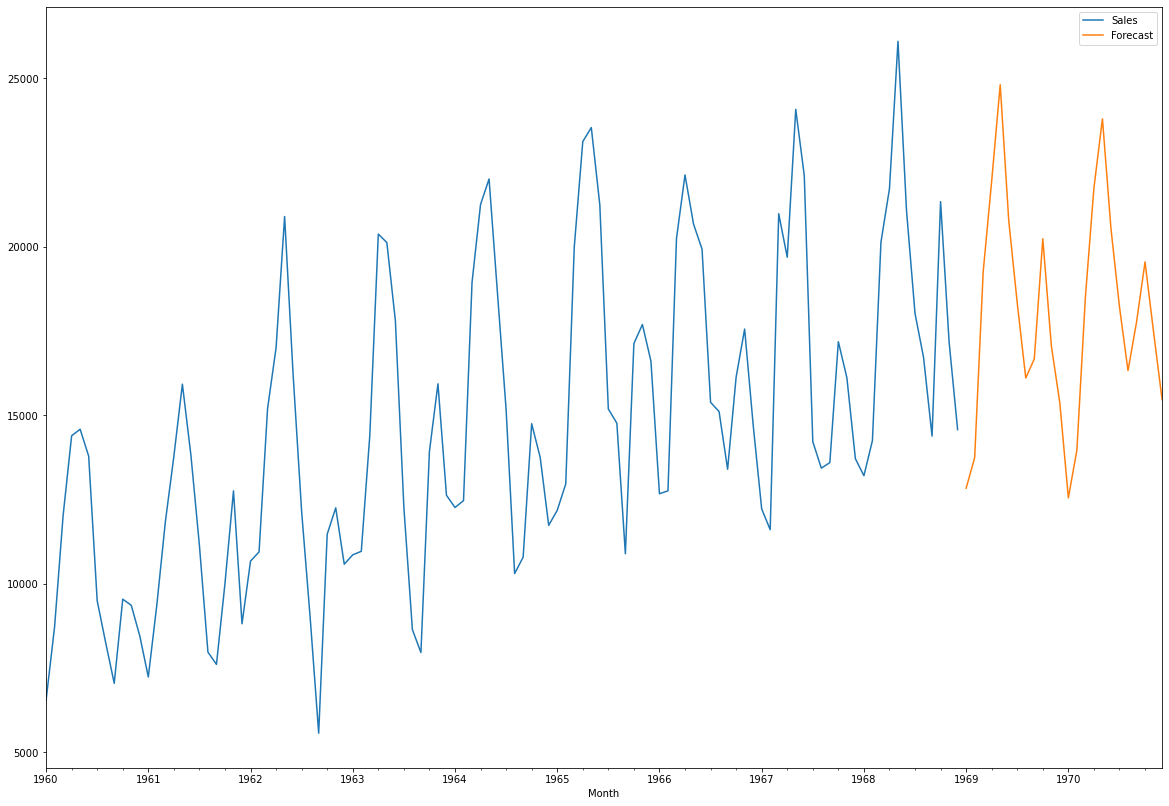

In [92]:
plt.figure(figsize=(20, 14))

df_new['Sales'].plot(legend=True,label = 'Sales')

forecast.plot(legend=True,label = 'Forecast')

plt.title("ARIMA Forecasting Model")

plt.show()

You can compare the last graph of ARIMA model with the Triple Exponential Smoothing graph from Triple_Exponential.ipynb code in this folder. 